In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('tip_dataset.csv')

print(data.head())
print(data.info())


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None


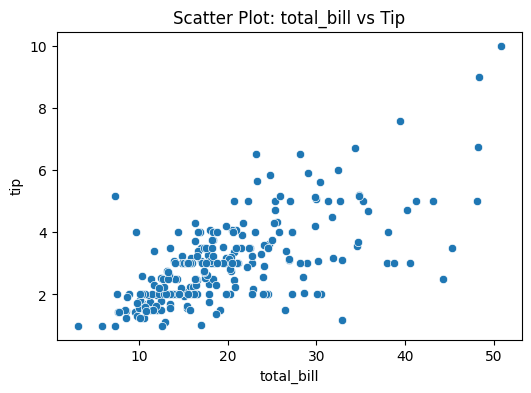

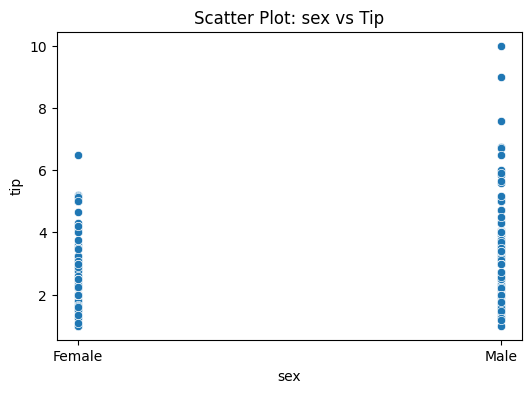

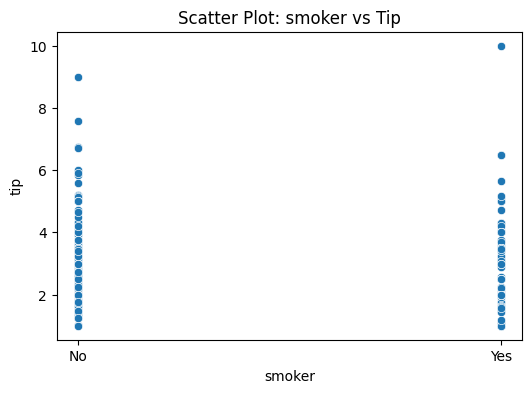

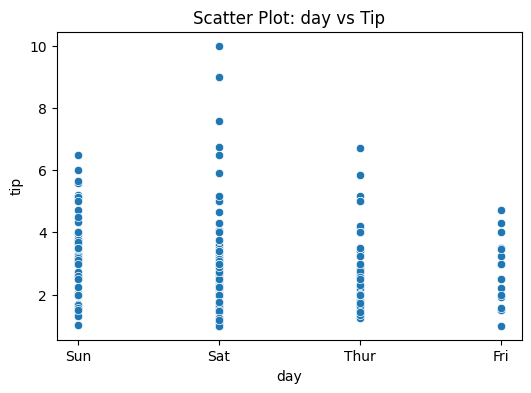

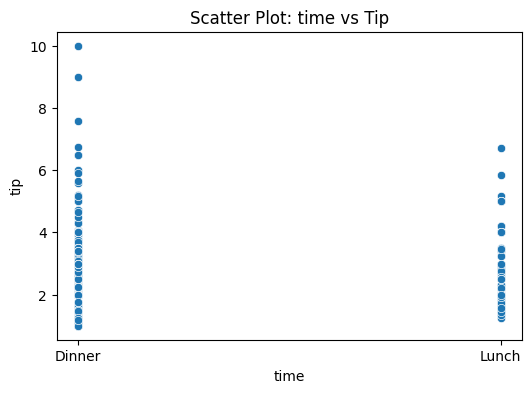

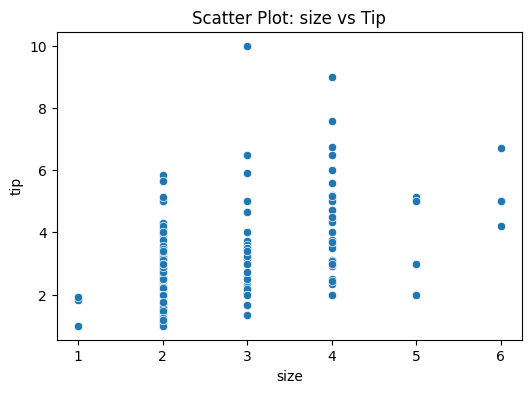

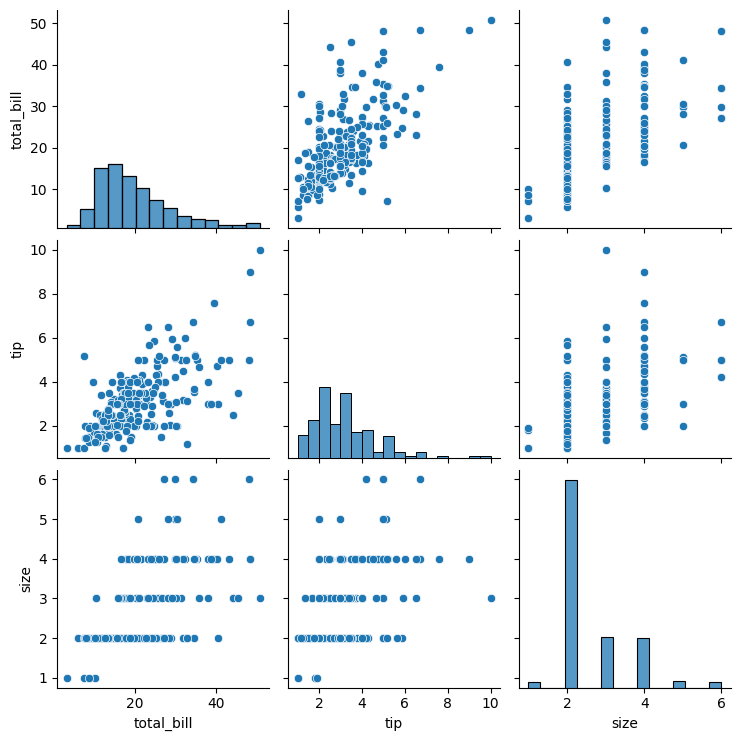

In [2]:
for column in data.columns:
    if column != 'tip':
        plt.figure(figsize=(6,4))
        sns.scatterplot(data=data, x=column, y='tip')
        plt.title(f'Scatter Plot: {column} vs Tip')
        plt.show()

sns.pairplot(data)
plt.show()


In [3]:

from sklearn.preprocessing import LabelEncoder


columns_to_encode = ['sex', 'time', 'smoker', 'day']


label_encoder = LabelEncoder()


for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column]).astype(float)
    print(f"{column} encoding mapping: {dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))}\n")

print(data.head())



sex encoding mapping: {'Female': np.int64(0), 'Male': np.int64(1)}

time encoding mapping: {'Dinner': np.int64(0), 'Lunch': np.int64(1)}

smoker encoding mapping: {'No': np.int64(0), 'Yes': np.int64(1)}

day encoding mapping: {'Fri': np.int64(0), 'Sat': np.int64(1), 'Sun': np.int64(2), 'Thur': np.int64(3)}

   total_bill   tip  sex  smoker  day  time  size
0       16.99  1.01  0.0     0.0  2.0   0.0     2
1       10.34  1.66  1.0     0.0  2.0   0.0     3
2       21.01  3.50  1.0     0.0  2.0   0.0     3
3       23.68  3.31  1.0     0.0  2.0   0.0     2
4       24.59  3.61  0.0     0.0  2.0   0.0     4


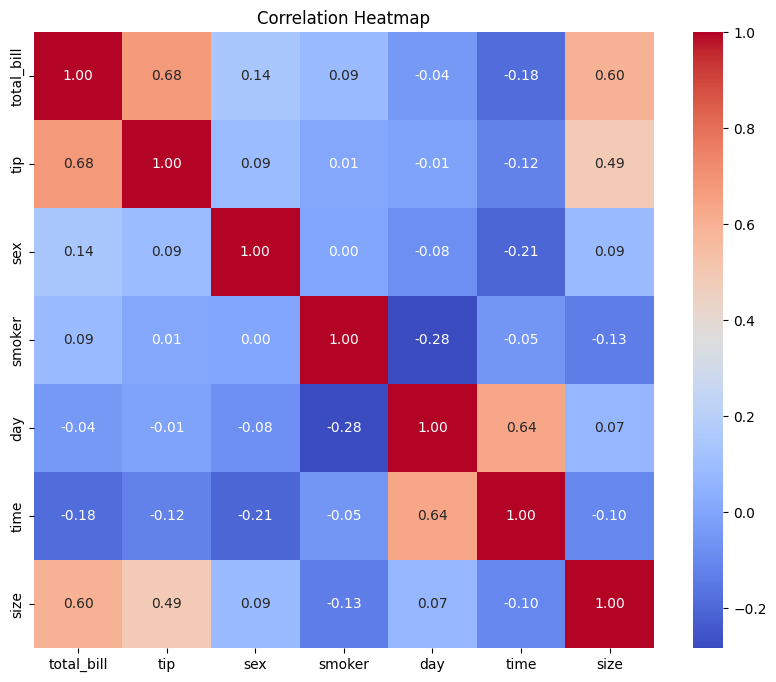

In [4]:

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


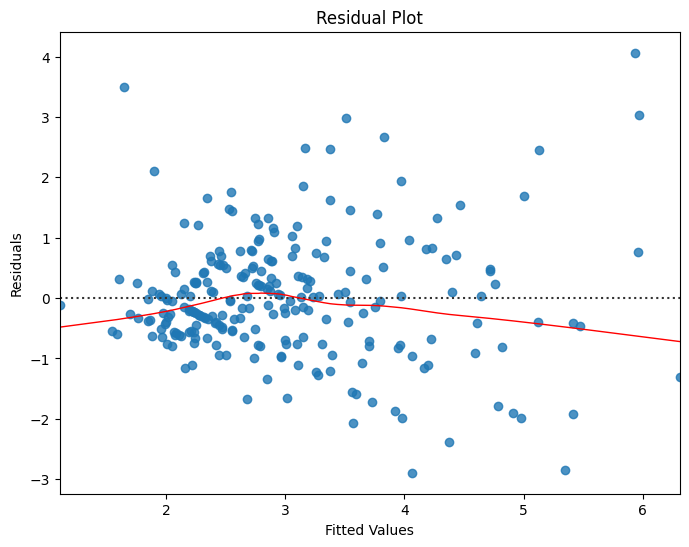

Rainbow Test Statistic: 1.2036274510126599, p-value: 0.15798464222013184


In [5]:
from statsmodels.graphics.gofplots import ProbPlot
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow


X = data.drop(columns=['tip'])
y = data['tip']

X_const = sm.add_constant(X)

ols_model = sm.OLS(y, X_const).fit()

residuals = ols_model.resid
fitted = ols_model.fittedvalues

plt.figure(figsize=(8, 6))
sns.residplot(x=fitted, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

rainbow_stat, rainbow_p_value = linear_rainbow(ols_model)
print(f"Rainbow Test Statistic: {rainbow_stat}, p-value: {rainbow_p_value}")


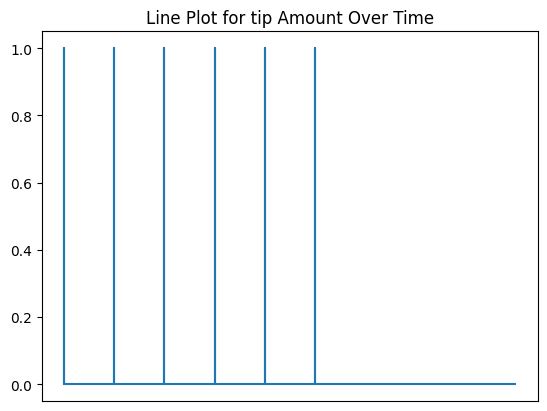

In [6]:
data['tip'] = pd.to_datetime(data['tip'])
data = data.sort_values(by='tip')
plt.plot(data['tip'], data['time'])
plt.title("Line Plot for tip Amount Over Time")
plt.show()

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name} - MSE: {mse:.2f}, R2 Score: {r2:.2f}")


Linear Regression - MSE: 0.72, R2 Score: 0.29
Ridge Regression - MSE: 0.72, R2 Score: 0.30
Lasso Regression - MSE: 0.67, R2 Score: 0.41
Decision Tree - MSE: 0.98, R2 Score: -0.17
Random Forest - MSE: 0.78, R2 Score: 0.26
SVR - MSE: 0.63, R2 Score: 0.44
KNN - MSE: 0.77, R2 Score: 0.27


Feature Importance:
 total_bill    0.794194
size          0.069953
smoker        0.054690
day           0.047397
sex           0.021657
time          0.012109
dtype: float64


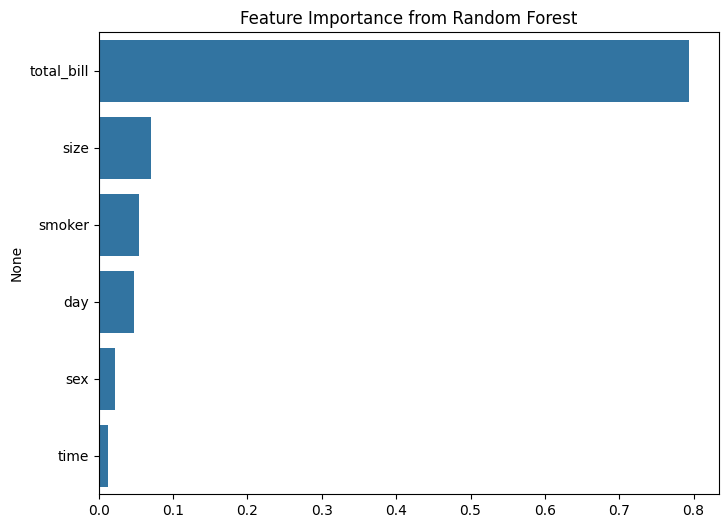

In [8]:
best_model = RandomForestRegressor()
best_model.fit(X_train, y_train)

importance = pd.Series(best_model.feature_importances_, index=X.columns)
importance = importance.sort_values(ascending=False)
print("Feature Importance:\n", importance)

plt.figure(figsize=(8, 6))
sns.barplot(x=importance.values, y=importance.index)
plt.title("Feature Importance from Random Forest")
plt.show()
